## Mount Google drive

In [1]:

from google.colab import drive

#Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


## Install required libraries
Install yfinance using pip to retrieve a wide range of historical stock data from yahoo finance.



In [2]:
# Install yfinance
!pip install yfinance

# Mount google drive in Google Collab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import necessary libraries

In [3]:
import yfinance as yf
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm



## Function to download historica stock data

##Loading the data set

This step involves loading the datasets using pandas  
and inspecting the data set structure to understand its
contents and columns .


In [4]:
def download_and_process_data(tickers, start_date, end_date, output_dir):
    """
    The function downloads historical data for the given tickers from
     Yahoo Finance,saves it to CSV files in a specified output directory,
     processes each dataset, and returns a merged dataframe.

    Parameters:
    - tickers: list of stock tickers to download data for
    - start_date: start date for historical data in 'YYYY-MM-DD' format
    - end_date: end date for historical data in 'YYYY-MM-DD' format
    - output_dir: directory to save the CSV files

    Returns:
    - merged_df: DataFrame with merged data for all tickers
    """
    os.makedirs(output_dir, exist_ok=True)
    processed_dfs = []

    for ticker in tickers:
        print(f"Downloading data for {ticker}")
        data = yf.download(ticker, start=start_date, end=end_date)
        file_path = os.path.join(output_dir, f"{ticker}_historical_data.csv")
        data.to_csv(file_path)
        print(f"Data for {ticker} saved to {file_path}")

        # Process the data
        df = pd.read_csv(file_path, header=0)
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.drop(labels=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
        df = df.rename(columns={'Adj Close': ticker.split('.')[0]})

        processed_dfs.append(df)

    # Merge all dataframes on 'Date'
    merged_df = processed_dfs[0]
    for df in processed_dfs[1:]:
        merged_df = pd.merge(merged_df, df, on='Date', how='inner')

    return merged_df

# List tickers to download data
tickers = ['BATS.L', 'CCH.L', 'LAND.L', 'SVT.L', 'GLEN.L', 'RR.L', 'RTO.L',
           'SGE.L', 'LGEN.L', 'SN.L']

# Indicate start and end date for historical data
start_date = '2014-01-01'
end_date = '2023-12-31'

# Save CSV to directory
output_dir = 'historical_data'

# Call the function and capture the merged dataframe
merged_df = download_and_process_data(tickers, start_date, end_date, output_dir)

# Display the merged dataframe
print(merged_df)

[*********************100%%**********************]  1 of 1 completed


Data for BATS.L saved to historical_data/BATS.L_historical_data.csv


[*********************100%%**********************]  1 of 1 completed


Data for CCH.L saved to historical_data/CCH.L_historical_data.csv


[*********************100%%**********************]  1 of 1 completed


Data for LAND.L saved to historical_data/LAND.L_historical_data.csv


[*********************100%%**********************]  1 of 1 completed


Data for SVT.L saved to historical_data/SVT.L_historical_data.csv


[*********************100%%**********************]  1 of 1 completed


Data for GLEN.L saved to historical_data/GLEN.L_historical_data.csv


[*********************100%%**********************]  1 of 1 completed


Data for RR.L saved to historical_data/RR.L_historical_data.csv


[*********************100%%**********************]  1 of 1 completed


Data for RTO.L saved to historical_data/RTO.L_historical_data.csv


[*********************100%%**********************]  1 of 1 completed


Data for SGE.L saved to historical_data/SGE.L_historical_data.csv


[*********************100%%**********************]  1 of 1 completed


Data for LGEN.L saved to historical_data/LGEN.L_historical_data.csv


[*********************100%%**********************]  1 of 1 completed

Data for SN.L saved to historical_data/SN.L_historical_data.csv
           Date         BATS          CCH        LAND          SVT  \
0    2014-01-02  1680.686768  1241.764038  645.337585  1098.838867   
1    2014-01-03  1676.756958  1215.688354  652.825500  1109.217529   
2    2014-01-06  1679.638916  1236.126099  654.527527  1105.325562   
3    2014-01-07  1669.159058  1268.544434  664.738586  1081.324707   
4    2014-01-08  1652.915405  1254.449463  666.100037  1061.864624   
...         ...          ...          ...         ...          ...   
2511 2023-12-21  2176.073242  2209.205322  696.267212  2551.663574   
2512 2023-12-22  2181.312256  2211.137207  695.300171  2541.957764   
2513 2023-12-27  2177.502197  2210.171143  699.748535  2532.251953   
2514 2023-12-28  2174.168213  2209.205322  692.785889  2516.722656   
2515 2023-12-29  2186.551270  2226.593018  681.568237  2503.134277   

            GLEN          RR         RTO          SGE        LGEN           SN  
0     208.1740

## Exploratory Data Analysis
This includes handling missing values,
 converting columns to datetime ojects ,
 generate summary statistics for the dataset and
  create visulaisations to understand the data
   distribution and relationships


Missing values:
Date    0
BATS    0
CCH     0
LAND    0
SVT     0
GLEN    0
RR      0
RTO     0
SGE     0
LGEN    0
SN      0
dtype: int64

Duplicate rows:
0

Descriptive Statistics:
                                Date         BATS          CCH         LAND  \
count                           2516  2516.000000  2516.000000  2516.000000   
mean   2018-12-25 03:44:21.367249664  2327.028661  1703.292812   685.408548   
min              2014-01-02 00:00:00  1509.605713   765.286682   395.000946   
25%              2016-06-28 18:00:00  2011.316284  1200.081818   596.980789   
50%              2018-12-19 12:00:00  2199.255615  1829.577393   687.274292   
75%              2021-06-21 06:00:00  2688.152527  2098.368958   766.954773   
max              2023-12-29 00:00:00  3410.238281  2504.722412   966.341309   
std                              NaN   414.124652   482.643201   117.805168   

               SVT         GLEN           RR          RTO          SGE  \
count  2516.000000  2516.00000

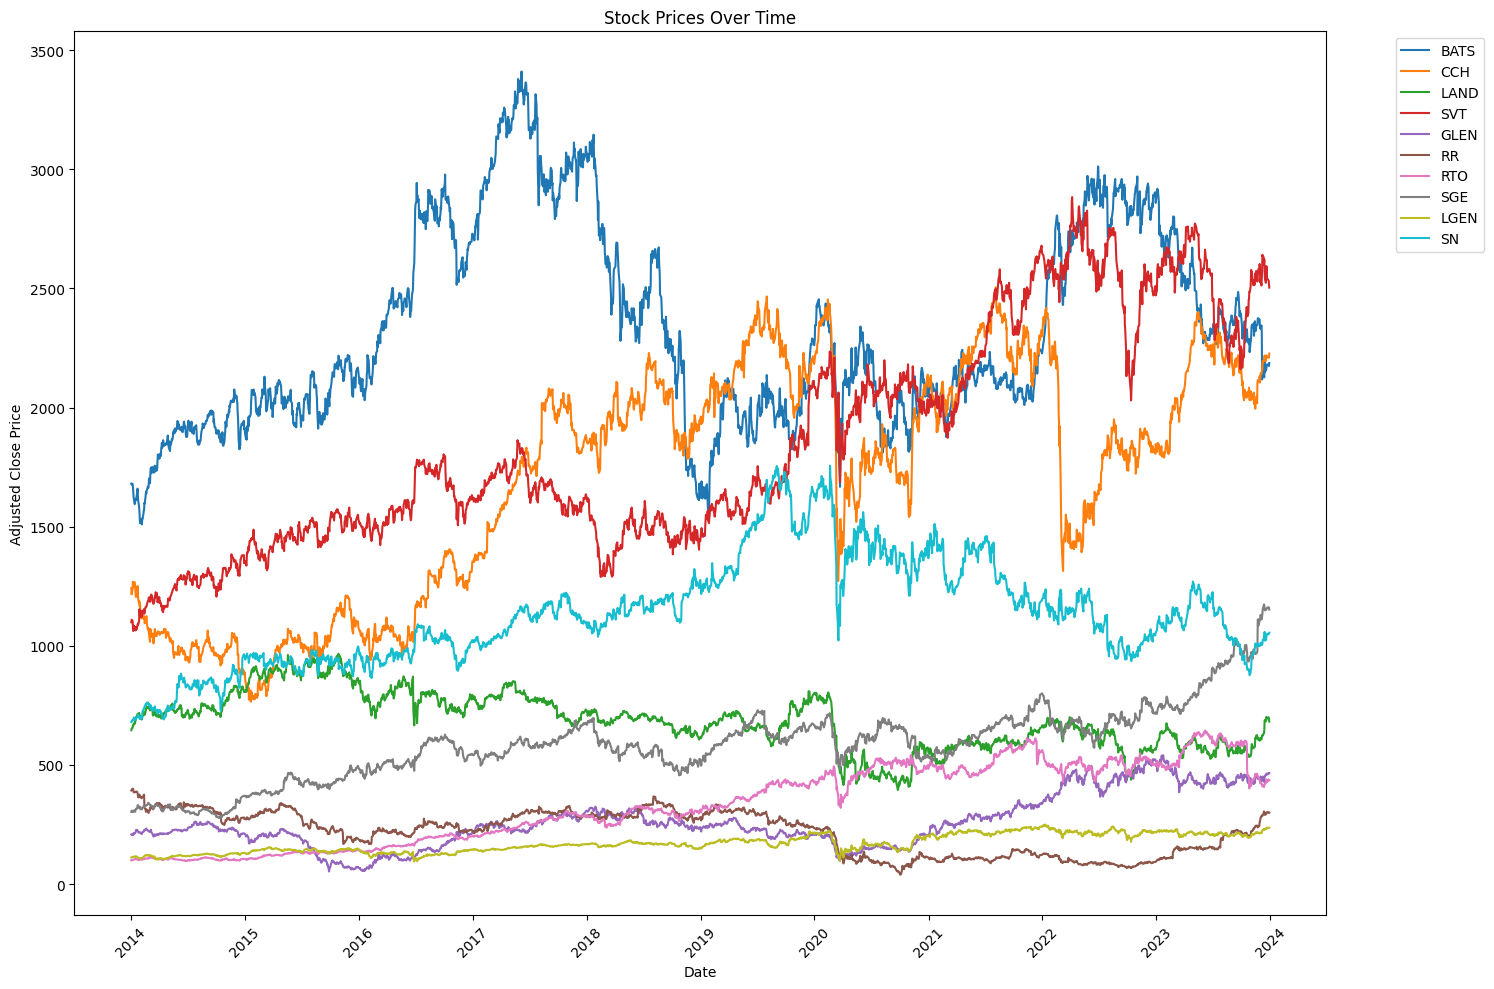

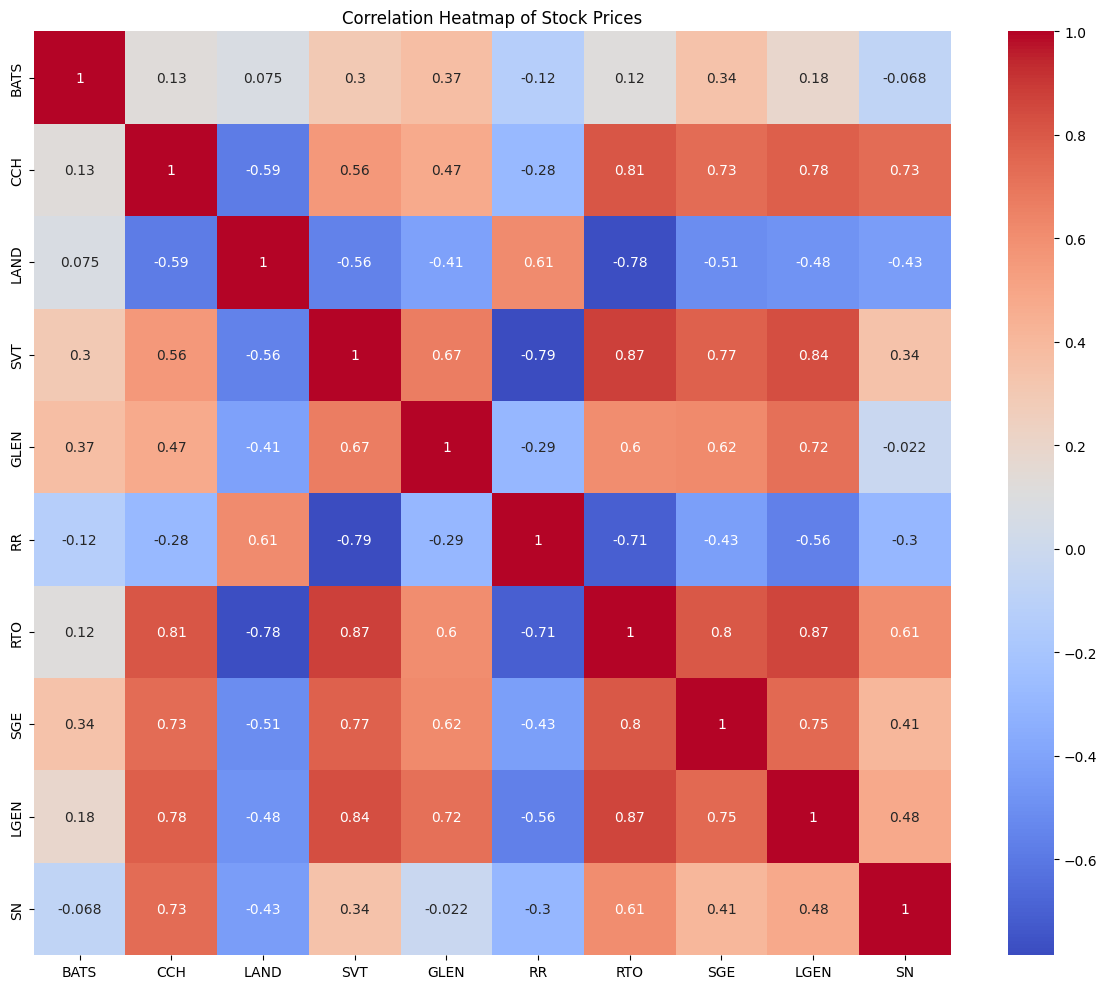

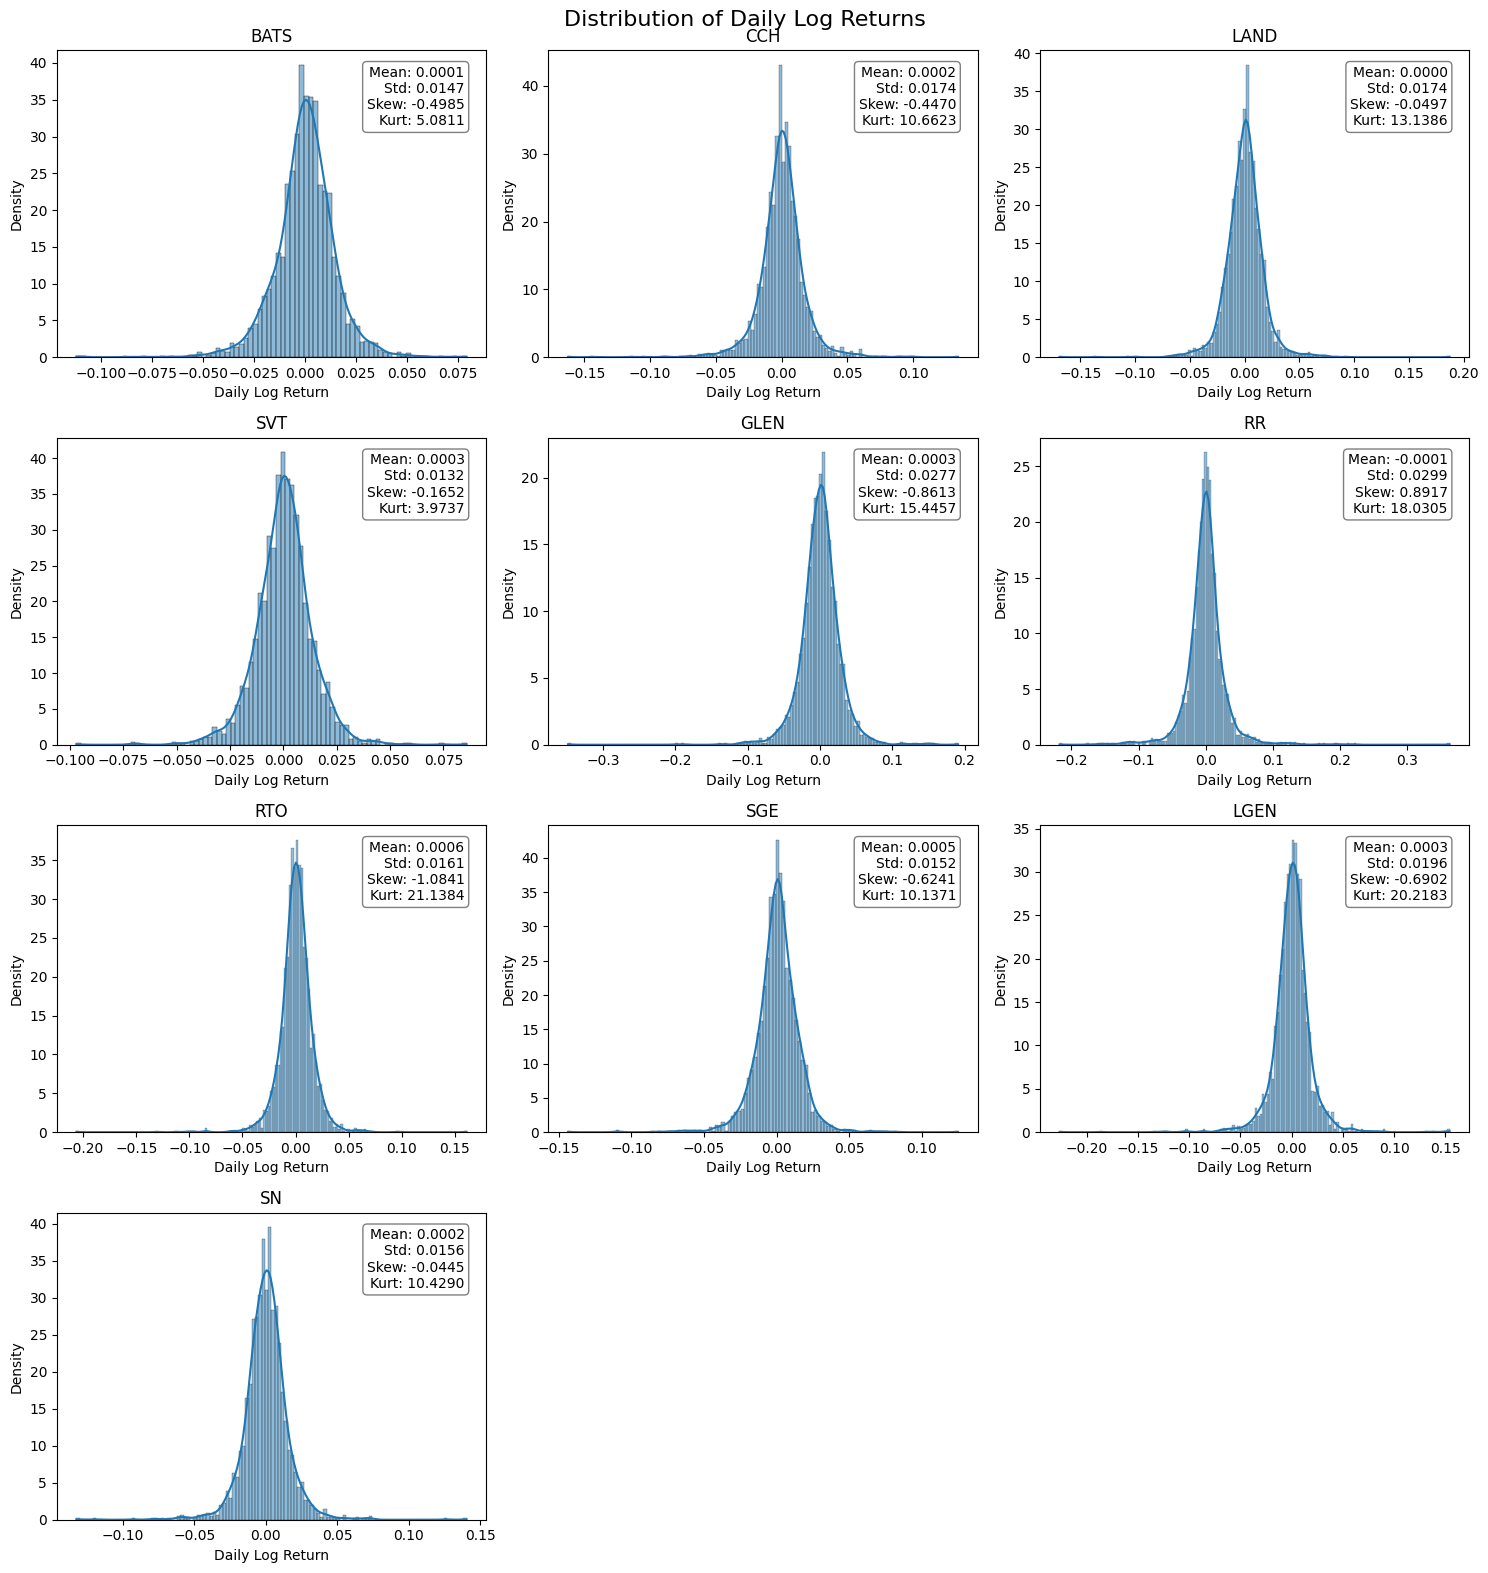

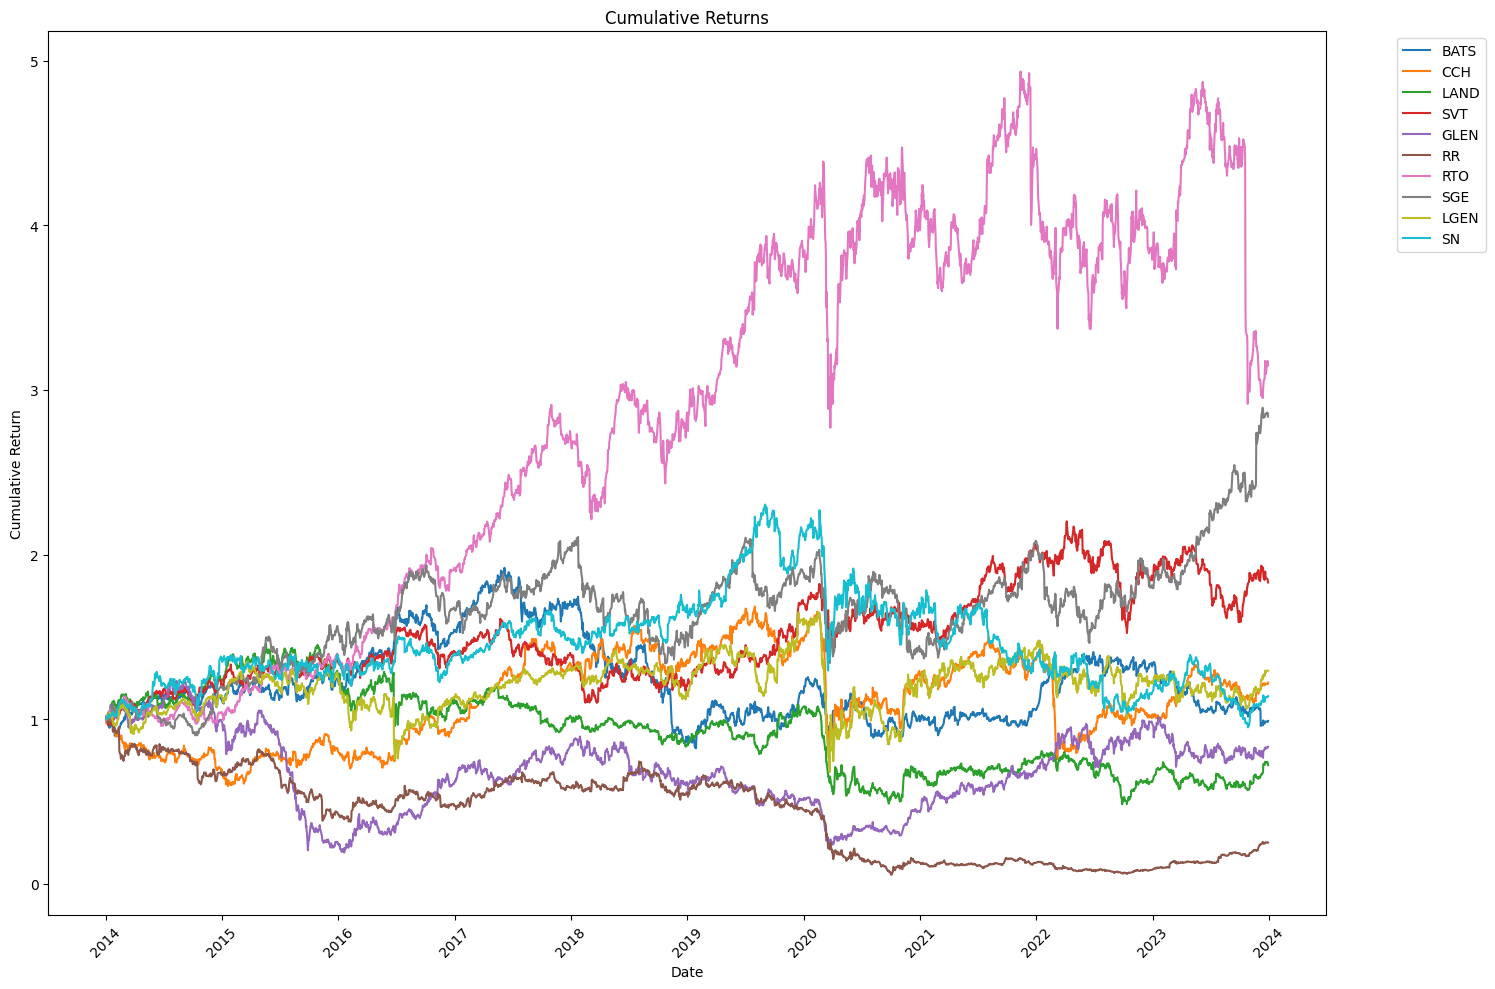

Average Log Returns:
BATS    0.000105
CCH     0.000232
LAND    0.000022
SVT     0.000327
GLEN    0.000320
RR     -0.000108
RTO     0.000587
SGE     0.000531
LGEN    0.000298
SN      0.000175
dtype: float64

Cumulative Returns:
BATS    0.989898
CCH     1.223372
LAND    0.722064
SVT     1.830921
GLEN    0.832447
RR      0.251450
RTO     3.149186
SGE     2.838324
LGEN    1.295023
SN      1.140853
Name: 2515, dtype: float64

Sharpe Ratios:
BATS    0.112955
CCH     0.212082
LAND    0.019852
SVT     0.394570
GLEN    0.183335
RR     -0.057185
RTO     0.580292
SGE     0.555140
LGEN    0.240958
SN      0.177436
dtype: float64

Skewness:
BATS   -0.498493
CCH    -0.446973
LAND   -0.049741
SVT    -0.165231
GLEN   -0.861285
RR      0.891731
RTO    -1.084099
SGE    -0.624065
LGEN   -0.690201
SN     -0.044513
dtype: float64

Kurtosis:
BATS     5.081090
CCH     10.662330
LAND    13.138581
SVT      3.973709
GLEN    15.445725
RR      18.030483
RTO     21.138360
SGE     10.137109
LGEN    20.218342
SN    

In [15]:
def perform_eda(merged_df):
    """
    Perform exploratory data analysis (EDA) on the dataset.

    Parameters:
    - merged_df (pd.DataFrame): Merged DataFrame containing stock price data
      for multiple stocks.

    Returns:
    - dict: Dictionary containing EDA results such as correlations, average
      returns, volatility, and cumulative returns.
    """
    # Initialize a dictionary to store results
    results = {}

    # Check for missing values
    print('\nMissing values:')
    print(merged_df.isnull().sum())  # Print the count of missing values

    # Check for duplicate rows and print number of duplicate rows
    print('\nDuplicate rows:')
    print(merged_df.duplicated().sum())  # Print the count of duplicate rows

    # Print summary statistics for the DataFrame
    print("\nDescriptive Statistics:")
    print(merged_df.describe())  # Print summary statistics

    # Plot stock prices over time
    plt.figure(figsize=(15, 10))  # Set the figure size
    for column in merged_df.columns:
        if column != 'Date':  # Skip the 'Date' column
            plt.plot(merged_df['Date'], merged_df[column], label=column)
    plt.title('Stock Prices Over Time')  # Set plot title
    plt.xlabel('Date')  # Set x-axis label
    plt.ylabel('Adjusted Close Price')  # Set y-axis label
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()  # Display the plot

    # Calculate correlation heatmap
    corr = merged_df.drop('Date', axis=1).corr()  # Calculate correlation
    results['corr'] = corr  # Store the correlation matrix in results
    plt.figure(figsize=(12, 10))  # Set the figure size
    sns.heatmap(corr, annot=True, cmap='coolwarm')  # Plot heatmap
    plt.title('Correlation Heatmap of Stock Prices')  # Set plot title
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()  # Display the plot

    # Calculate log returns
    log_ret = np.log(merged_df.drop('Date', axis=1)).diff().dropna()
    results['avg_log_ret'] = log_ret.mean()  # Store average log returns

    # Align dates with log returns
    dates = merged_df['Date'].iloc[1:]

    # Plot distribution of daily log returns in separate subplots
    num_stocks = len(log_ret.columns)  # Number of stocks
    num_cols = 3  # Number of columns for subplots
    num_rows = (num_stocks - 1) // num_cols + 1  # Calculate the number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols,
    4*num_rows))
    fig.suptitle('Distribution of Daily Log Returns', fontsize=16)

    axes = axes.flatten()

    for i, col in enumerate(log_ret.columns):
        sns.histplot(log_ret[col], kde=True, ax=axes[i], stat='density',
                     alpha=0.5)
        axes[i].set_title(col)
        axes[i].set_xlabel('Daily Log Return')
        axes[i].set_ylabel('Density')

        mean = log_ret[col].mean()
        std = log_ret[col].std()
        skew = log_ret[col].skew()
        kurt = log_ret[col].kurtosis()

        # Format Statistics Text
        stats_text = (
        f'Mean: {mean:.4f}\nStd: {std:.4f}\nSkew: {skew:.4f}\nKurt: {kurt:.4f}'
        )

        # Add text to the plot
        axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # Remove unused subplots
    for i in range(num_stocks, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    # Calculate cumulative returns
    cum_ret = (1 + log_ret).cumprod()
    results['cum_ret'] = cum_ret.iloc[-1]

    plt.figure(figsize=(15, 10))
    for col in cum_ret.columns:
        plt.plot(dates, cum_ret[col], label=col)
    plt.title('Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate additional statistics
    ann_ret = log_ret.mean() * 252
    ann_vol = log_ret.std() * np.sqrt(252)
    results['sharpe'] = ann_ret / ann_vol
    results['skew'] = log_ret.skew()
    results['kurt'] = log_ret.kurtosis()

    return results

# Perform EDA and store the results
eda_results = perform_eda(merged_df)

# Print EDA results
print("Average Log Returns:")
print(eda_results['avg_log_ret'])
print("\nCumulative Returns:")
print(eda_results['cum_ret'])
print("\nSharpe Ratios:")
print(eda_results['sharpe'])
print("\nSkewness:")
print(eda_results['skew'])
print("\nKurtosis:")
print(eda_results['kurt'])
